<a href="https://colab.research.google.com/github/fduartej/forecasting-food/blob/main/Forecasting_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Forecasting Food**

Resumen

El presente trabajo tiene como objetivo la creacion de un modelo de regresion de ML para el prediccion de la comida (forecasting food)

In [23]:
# imports
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

meal_info = pd.read_csv('meal_info.csv')

fulfilment_center_info = pd.read_csv('fulfilment_center_info.csv')

historico = pd.read_csv('train.csv')



Preprocesamiento

In [3]:
#merge meal_info into train 
historico_join = pd.merge(historico, 
                      meal_info, 
                      on ='meal_id', 
                      how ='inner')
historico_join.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai


In [4]:
#merge fulfilment_center_info into train

historico_join = pd.merge(historico_join, 
                      fulfilment_center_info, 
                      on ='center_id', 
                      how ='inner')
historico_join.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [5]:
#convert categorical string data into numeric
historico_data=pd.get_dummies(historico_join)


             id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1018704     2         55     1885          135.83      152.29   
2       1196273     3         55     1885          132.92      133.92   
3       1116527     4         55     1885          135.86      134.86   
4       1343872     5         55     1885          146.50      147.50   
...         ...   ...        ...      ...             ...         ...   
456543  1437396   141         61     2104          583.03      630.53   
456544  1060716   142         61     2104          581.03      582.03   
456545  1029231   143         61     2104          583.03      581.03   
456546  1141147   144         61     2104          582.03      581.03   
456547  1443704   145         61     2104          581.03      582.03   

        emailer_for_promotion  homepage_featured  num_orders  city_code  ...  \
0                           0              

In [6]:
historico_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,1,0,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,0,1,0,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,0,0,0,0,0,0,1,0,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,0,0,0,0,0,0,1,0,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,0,0,0,0,0,0,1,0,0,1


Analisis de la Data

In [7]:
historico_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,...,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,...,0.058955,0.027763,0.065581,0.225157,0.246660,0.269249,0.258934,0.575801,0.206055,0.218144
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,...,0.235542,0.164292,0.247549,0.417686,0.431067,0.443570,0.438050,0.494221,0.404471,0.412986
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


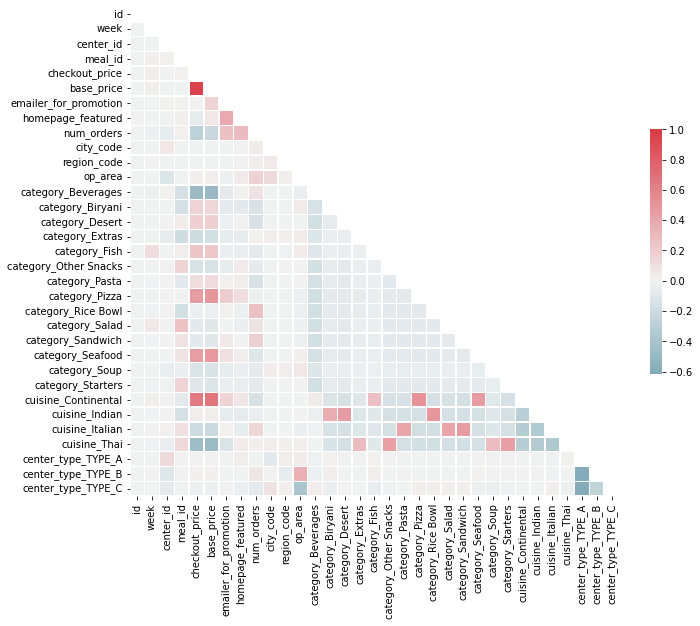

In [12]:
#Multicolinearidad
corr = historico_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Train validation split

In [17]:
x = historico_data.drop('checkout_price', axis=1)
y = historico_data['checkout_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_test.shape}')

Train shape     : (365238, 32)
Validation shape: (91310, 32)


## Usando LinearRegression

In [18]:
def score(m, x_train, y_train, x_test, y_test):
    print(f'Scores:')
    print(f'Train = {m.score(x_train, y_train):.4}')
    print(f'Test = {m.score(x_test, y_test):.4}')

In [19]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(x_train, y_train)
score(m, x_train, y_train, x_test, y_test) 

Scores:
Train = 0.9416
Test = 0.9423


In [21]:
# Veamos el MSE  --- NIVEL DE ERROR ES ALTO
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, m.predict(x_train)), mean_squared_error(y_test, m.predict(x_test))

(1366.125065572414, 1348.1031700885997)

In [22]:
imp = pd.DataFrame({'col':x_train.columns, 
                    'importance':m.coef_}).sort_values(
    'importance', ascending=False)
imp.style.bar()

,col,importance
12,category_Biryani,32.059530
13,category_Desert,22.636644
25,cuisine_Continental,19.395822
19,category_Rice Bowl,15.370833
15,category_Fish,14.142784
18,category_Pizza,8.072550
22,category_Seafood,5.003751
21,category_Sandwich,1.741760
10,op_area,1.108079
30,center_type_TYPE_B,0.973495
